# **GEOET - Prospero**

Authors: Concetta D'Amato, Michele Bottazzi and Riccardo Rigon. 

This work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
___

### *What about Prospero*

Bottazzi, Michele. n.d. “[Transpiration Theory and the Prospero Component of GEOframe](https://paperpile.com/shared/yN2wjv).” Supervised by R. Rigon and G. Bertoldi. Ph.D., Civil, Environmental and Mechanical Engineering of University of Trento. 

More informations http://abouthydrology.blogspot.com/2020/07/michele-bottazzi-phd-thesis.html

In [1]:
import os
import warnings
import datetime
import warnings
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates
from IPython.display import Image
import plotly.graph_objects as go
import plotly.express as px
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
oms_project_path = os.path.dirname(os.getcwd())

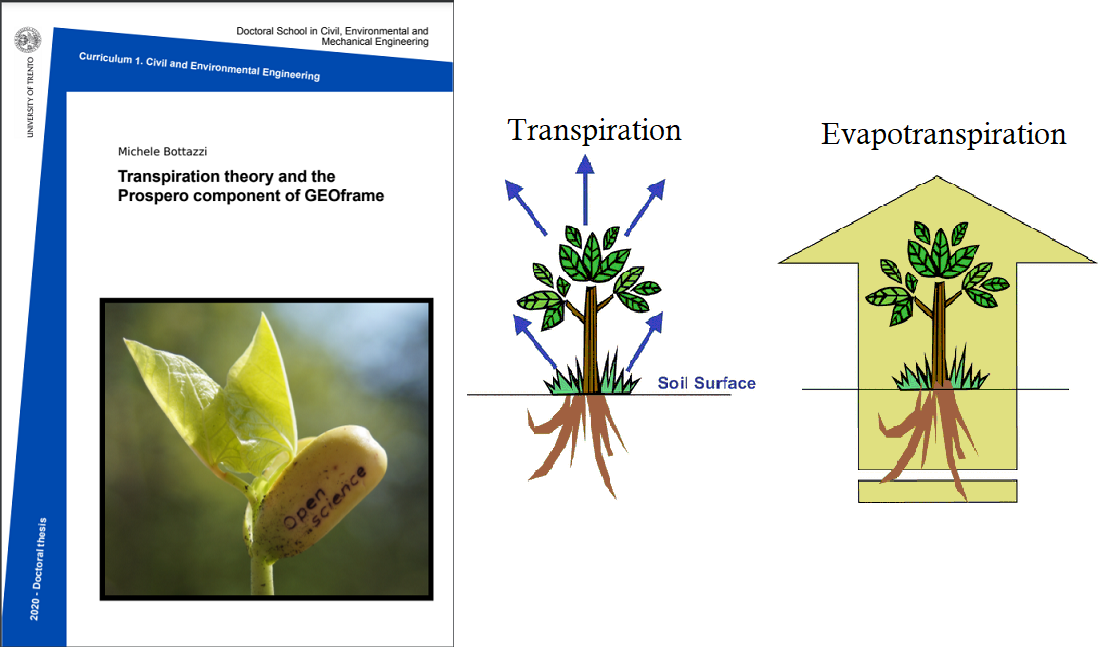

In [2]:
Image(oms_project_path+"/Images/Pro.png")

## **Transpiration**

In Prospero the transpiration is computed starting from the [Schymanski and Or method](https://hess.copernicus.org/articles/21/685/2017/)  and modified in order to include the dependence from transpiring surface, the conductance model of the stomata, other than the mass conservation. Prospero solves a four linear equation system and compute the leaf temperature, the vapour pressure, the sensible heat and the latent heat.

## Input required
- Dem
- Centroids
- Air temperature [C°]
- Wind velocity [m/s]
- Relative humidity [%]
- Shortwave direct radiation [W/m$^2$]
- Shortwave diffuse radiation [W/m$^2$]
- Longwave radiation [W/m$^2$]
- Net Radiation [W/m$^2$]
- Atmospheric pressure [Pa]
- Leaf Area Index (LAI) [-]
- Soil water content [-]
- Ground Heat Flux [W/m$^2$]

## Prospero model Output

- Latent heat both for sunlight and shaded canopy [$W/m^{2}$];
- Traspiration flux [$W/m^{2}$];
- Transpiration [$mm/h$];
- Leaves temperature both for sunlight and shaded canopy [$W/m^{2}$];
- Sensible heat both for sunlight and shaded canopy [$W/m^{2}$];
- Fraction of highlighted canopy [-];
- Shortwave radiation absorbed both for sunlight and shaded canopy [$W/m^{2}$];

In [3]:
os.chdir(oms_project_path+'/resources/Output/')
#os.listdir()

### **Transpiration  $[W m^{−2}]$**

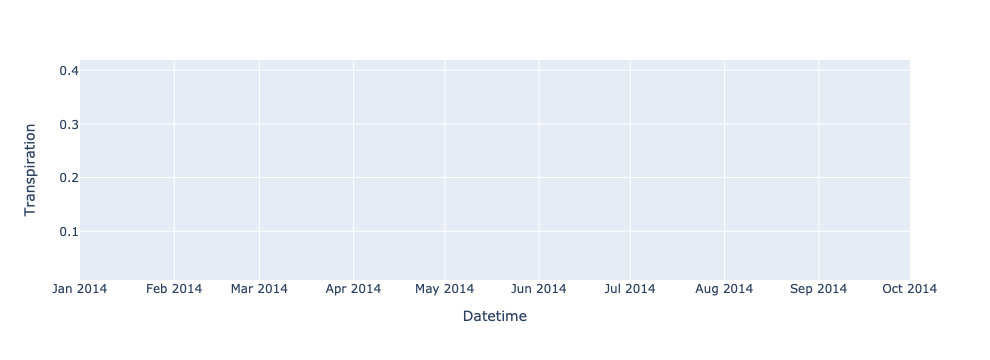

In [4]:
df2 = pd.read_csv('Transpiration_1_potential.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df2.columns = ['Datetime','Transpiration']
fig = px.line(df2, x='Datetime', y='Transpiration')
fig.update_traces(line_color='green')
fig.show()

In [6]:
dfP = pd.read_csv('Transpiration_1_potential.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
dfP.columns = ['Datetime','Transpiration']
dfE = pd.read_csv('Transpiration_1_environmentalstress.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
dfE.columns = ['Datetime','Transpiration']
dfT = pd.read_csv('Transpiration_1_totalstress.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
dfT.columns = ['Datetime','Transpiration']
dfW = pd.read_csv('Transpiration_1_waterstress.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
dfW.columns = ['Datetime','Transpiration']


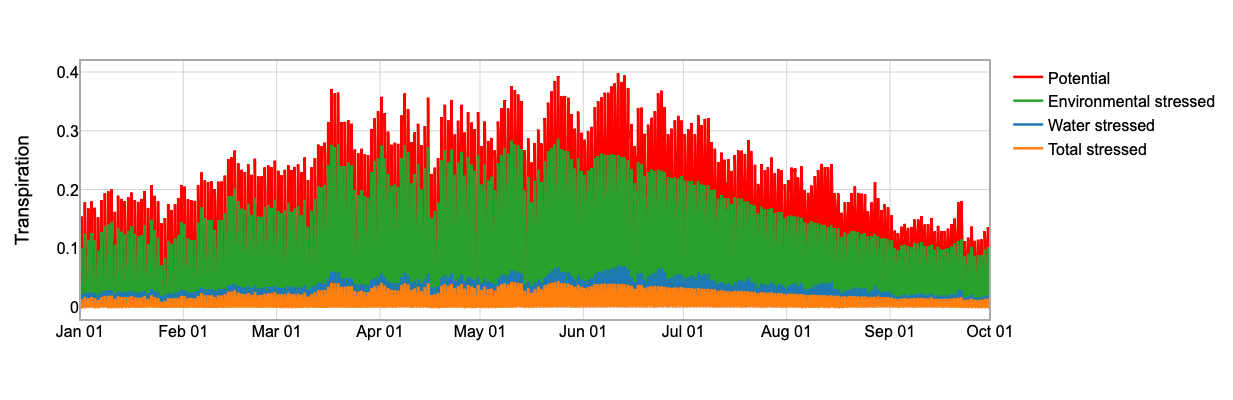

In [7]:
fig = px.line()
fig.add_trace(go.Scatter(x=dfP['Datetime'], y=dfP['Transpiration'], mode='lines', name='Potential',line=dict(color="red", width=2.5)))
fig.add_trace(go.Scatter(x=dfE['Datetime'], y=dfE['Transpiration'], mode='lines', name='Environmental stressed',line=dict(color="#2ca02c", width=2.5)))
fig.add_trace(go.Scatter(x=dfW['Datetime'], y=dfW['Transpiration'], mode='lines', name='Water stressed',line=dict(color="#1f77b4", width=2.5)))
fig.add_trace(go.Scatter(x=dfT['Datetime'], y=dfT['Transpiration'], mode='lines', name='Total stressed',line=dict(color="#ff7f0e", width=2.5)))


fig.update_layout(
    height=400, width=1200,
    title='',
    #xaxis_title="Date"
    font_family="Arial",
    font_color="Black",
    title_font_family="Arial",
    title_font_color="Black",
    yaxis_title="Transpiration",
    #legend_title="Date",
    font=dict(size=16),
    #yaxis_range=[-10,250],
    #legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01, title=""),
    plot_bgcolor="white",
)
fig.add_shape(type="rect", xref="paper", yref="paper", x0=fig['layout']['xaxis']['domain'][0], y0=fig['layout']['yaxis']['domain'][0], x1=fig['layout']['xaxis']['domain'][1], y1=fig['layout']['yaxis']['domain'][1], line=dict(color="darkgray", width=2))
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinecolor="darkgray", zerolinewidth=1,tickfont=dict(size=16))
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True,zerolinecolor="darkgray", zerolinewidth=1, showticklabels=True,tickfont=dict(size=16), tickformat='%b %d')
fig.show()

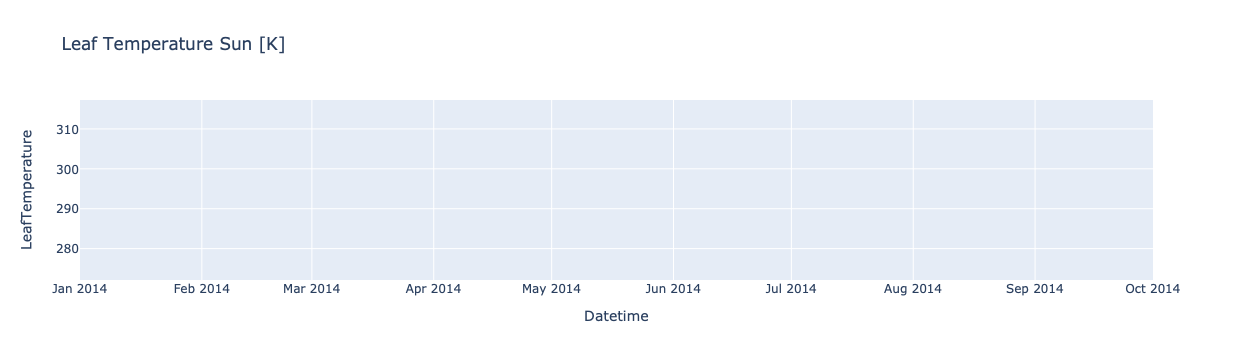

In [8]:
df = pd.read_csv('LT_Sun_1_potential.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Datetime','LeafTemperature']
fig = px.line(df, x='Datetime', y='LeafTemperature', title='Leaf Temperature Sun [K]')
fig.update_traces(line_color='green')
fig.show()

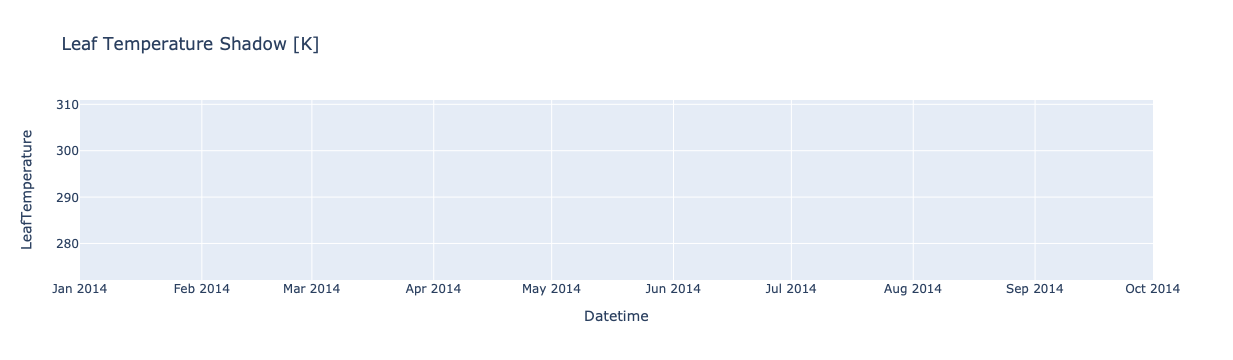

In [9]:
df = pd.read_csv('LT_Shade_1_potential.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Datetime','LeafTemperature']
fig = px.line(df, x='Datetime', y='LeafTemperature', title='Leaf Temperature Shadow [K]')
fig.update_traces(line_color='green')
fig.show()